In [12]:
import gzip

In [13]:
"""for filename in ['sample_submission.csv.gz','sales_train.csv.gz','test.csv.gz']:
  with gzip.open(filename, 'rt') as f:
    data = f.read()
    with open(filename[:-3], 'wt') as f:
      f.write(data)
"""

"for filename in ['sample_submission.csv.gz','sales_train.csv.gz','test.csv.gz']:\n  with gzip.open(filename, 'rt') as f:\n    data = f.read()\n    with open(filename[:-3], 'wt') as f:\n      f.write(data)\n"

In [128]:
import pandas as pd

In [129]:
df =  pd.read_csv('sales_train.csv')

In [130]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [131]:
df.shape

(2935849, 6)

In [132]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [138]:
ts = df.groupby("date_block_num")['item_cnt_day'].sum()

In [139]:
ts

date_block_num
0     131479.0
1     128090.0
2     147142.0
3     107190.0
4     106970.0
5     125381.0
6     116966.0
7     125291.0
8     133332.0
9     127541.0
10    130009.0
11    183342.0
12    116899.0
13    109687.0
14    115297.0
15     96556.0
16     97790.0
17     97429.0
18     91280.0
19    102721.0
20     99208.0
21    107422.0
22    117845.0
23    168755.0
24    110971.0
25     84198.0
26     82014.0
27     77827.0
28     72295.0
29     64114.0
30     63187.0
31     66079.0
32     72843.0
33     71056.0
Name: item_cnt_day, dtype: float64

In [140]:
ts.index=pd.date_range(start='2013-01-01',end='2015-10-01',freq='MS') # period of 34 months

In [141]:
ts.shape

(34,)

In [142]:
ts=ts.reset_index()

In [155]:
ts

,ds,y
0,2013-01-01,131479.0
1,2013-02-01,128090.0
2,2013-03-01,147142.0
3,2013-04-01,107190.0
4,2013-05-01,106970.0
5,2013-06-01,125381.0
6,2013-07-01,116966.0
7,2013-08-01,125291.0
8,2013-09-01,133332.0
9,2013-10-01,127541.0


In [156]:
ts = ts.rename(columns={'item_cnt_day':'item_cnt_month'})

In [157]:
ts.head()

,ds,y
0,2013-01-01,131479.0
1,2013-02-01,128090.0
2,2013-03-01,147142.0
3,2013-04-01,107190.0
4,2013-05-01,106970.0


In [158]:
from fbprophet import Prophet

In [159]:
m = Prophet(yearly_seasonality=True)

In [160]:
ts.columns=['ds','y']

In [161]:
ts.head()

,ds,y
0,2013-01-01,131479.0
1,2013-02-01,128090.0
2,2013-03-01,147142.0
3,2013-04-01,107190.0
4,2013-05-01,106970.0


In [162]:
m.fit(ts)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/hassan/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [163]:
future = m.make_future_dataframe(periods = 5,freq='MS')

In [164]:
forecast = m.predict(future)

In [165]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,141678.041599,129099.631674,135273.821483,141678.041599,141678.041599,-9566.680439,-9566.680439,-9566.680439,-9566.680439,-9566.680439,-9566.680439,0.0,0.0,0.0,132111.361160
1,2013-02-01,139958.210312,127854.891881,133976.022942,139958.210312,139958.210312,-8929.017339,-8929.017339,-8929.017339,-8929.017339,-8929.017339,-8929.017339,0.0,0.0,0.0,131029.192974
2,2013-03-01,138404.814316,144807.463059,151224.863895,138404.814316,138404.814316,9641.575105,9641.575105,9641.575105,9641.575105,9641.575105,9641.575105,0.0,0.0,0.0,148046.389421
3,2013-04-01,136684.983023,104279.384359,110762.188403,136684.983023,136684.983023,-29103.298617,-29103.298617,-29103.298617,-29103.298617,-29103.298617,-29103.298617,0.0,0.0,0.0,107581.684407
4,2013-05-01,135020.630152,104423.315641,110629.307751,135020.630152,135020.630152,-27684.049165,-27684.049165,-27684.049165,-27684.049165,-27684.049165,-27684.049165,0.0,0.0,0.0,107336.580987


In [166]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
34,2015-11-01,83193.957416,80100.075522,86435.236975
35,2015-12-01,125513.063181,122431.839711,128497.131521
36,2016-01-01,75625.688717,72583.172415,78808.611790
37,2016-02-01,40109.144632,37182.168412,43474.267698
38,2016-03-01,76664.084927,73583.431799,79895.569049


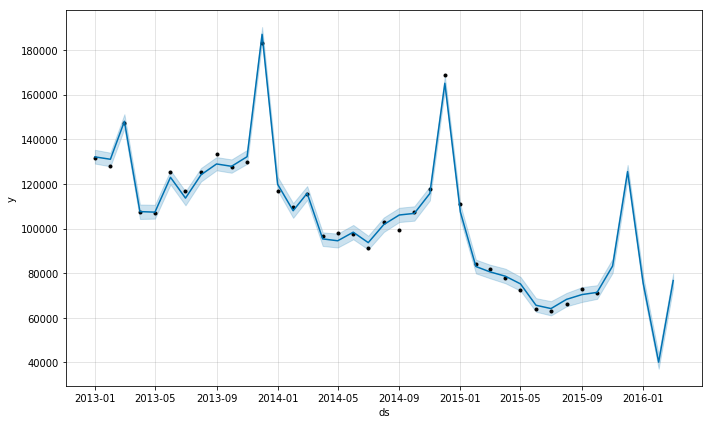

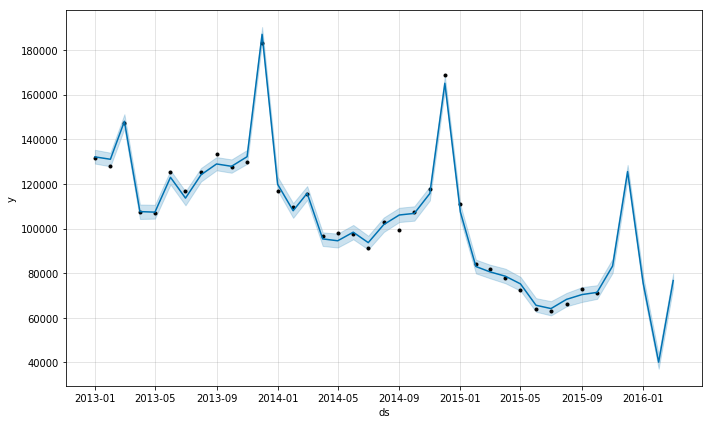

In [167]:
m.plot(forecast)

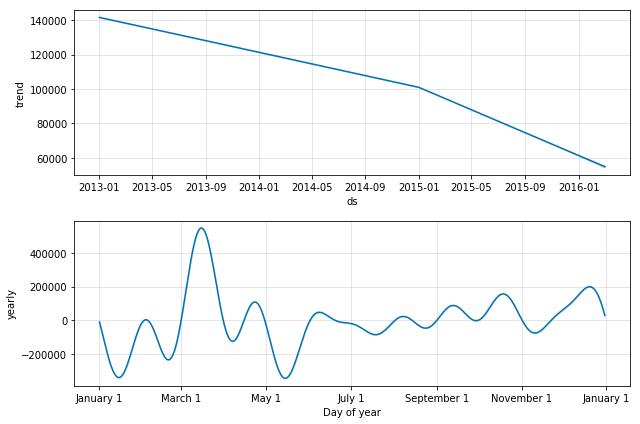

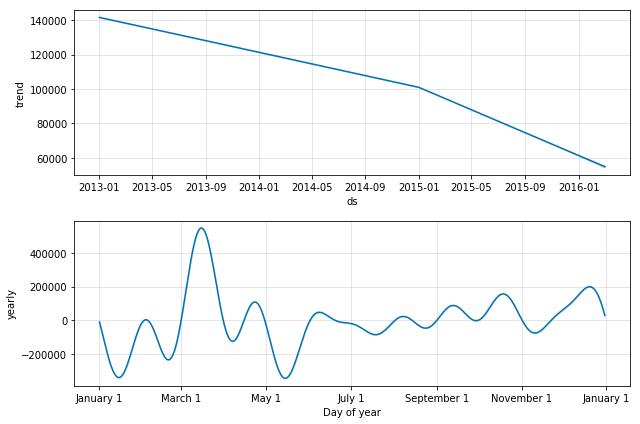

In [168]:
m.plot_components(forecast)

# thank you